In [1]:
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import networkx as nx

In [2]:
data = pd.read_csv('NAS_processed_032523.csv')

In [3]:
data

,Study ID,First author,Year,Exposure_Layer1,Exposure_Layer2,Exposure_Layer3,Outcome_Layer1,Outcome_Layer2,Outcome_Layer3,Publication_Title,Journal,Exposure_type,Outcome_type,Statistical_significance (Yes/No),Statistical_significance_cutoff
0,1,Wang C,2022.0,chemical,air pollution,short-term PM2.5 mass,biomarker,DNAmethylation,genes-450K,short- and intermediate-term exposure to ambie...,Environ Int,continuous,continuous,Yes,"Bonferroni correction, p-value < 4.96 × 10-9 (..."
1,1,NaN,NaN,chemical,air pollution,short-term PM2.5 elemental components,biomarker,DNAmethylation,genes-450K,NaN,NaN,continuous,continuous,Yes,"Bonferroni correction, p-value < 3.81 × 10-10 ..."
2,1,NaN,NaN,chemical,air pollution,short-term black carbon,biomarker,DNAmethylation,genes-450K,NaN,NaN,continuous,continuous,Yes,"Bonferroni correction, p-value < 4.96 × 10-9 (..."
3,1,NaN,NaN,chemical,air pollution,intermediate-term PM2.5 mass,biomarker,DNAmethylation,genes-450K,NaN,NaN,continuous,continuous,Yes,"Bonferroni correction, p-value < 4.96 × 10-9 (..."
4,1,NaN,NaN,chemical,air pollution,intermediate-term PM2.5 elemental components,biomarker,DNAmethylation,genes-450K,NaN,NaN,continuous,continuous,Yes,"Bonferroni correction, p-value < 3.81 × 10-10 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,121,NaN,NaN,chemical,air pollution,intermediate-term CO,biomarker,oxidative DNA damage,oxidative DNA damage,NaN,NaN,continuous,continuous,No,p-value < 0.05
424,121,NaN,NaN,chemical,air pollution,intermediate-term particle number,biomarker,oxidative DNA damage,oxidative DNA damage,NaN,NaN,continuous,continuous,Yes,p-value < 0.05
425,121,NaN,NaN,chemical,air pollution,intermediate-term sulfate,biomarker,oxidative DNA damage,oxidative DNA damage,NaN,NaN,continuous,continuous,Yes,p-value < 0.05
426,121,NaN,NaN,chemical,air pollution,intermediate-term organic carbon,biomarker,oxidative DNA damage,oxidative DNA damage,NaN,NaN,continuous,continuous,Yes,p-value < 0.05


In [4]:
publications = data['Publication_Title']

In [5]:
len(set(publications))
#there are 123-1 publications, with 1 element is NAN

122

In [6]:
publications_list = []

for v in publications:
    try:
        if float(v):
            publications_list.append(temp)
    except:
        temp = v
        publications_list.append(v)

In [7]:
len(set(publications_list))

121

In [8]:
publications_list

['short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'associations b

In [9]:
len(publications_list)

428

In [10]:
publications_list_cap = []
for v in publications_list:
    first = v[0]
    publications_list_cap.append(first.upper()+v[1:])

In [11]:
publications_list_cap

['Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study',
 'Associations b

In [12]:
Exposure_Layer2 = data['Exposure_Layer2']
Outcome_Layer2 = data['Outcome_Layer2']

In [13]:
intersection = set(Exposure_Layer2).intersection(set(Outcome_Layer2))

In [14]:
intersection

{'DNAmethylation',
 'air pollution',
 'blood lead',
 'bone lead',
 'cholesterol level',
 'depression',
 'diabetes',
 'leukocyte telomere length',
 'metabolites',
 'mitochondrial DNA',
 'toenail metals',
 'urinary metals'}

In [15]:
hierach1 = defaultdict(set)
edge2publication = defaultdict(list)
for i,v in enumerate(Exposure_Layer2):
    hierach1[v].add(Outcome_Layer2[i])
    edge2publication[(v,Outcome_Layer2[i])].append(publications_list_cap[i])

In [16]:
edge2publication

defaultdict(list,
            {('air pollution',
              'DNAmethylation'): ['Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study', 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study', 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study', 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study', 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wide DNA methylation in older men: the Normative Aging Study', 'Short- and intermediate-term exposure to ambient fine particulate elements and leukocyte epigenome-wi

In [17]:
exposures_l2 = []
outcomes_l2 = []
exposure_cate = []
outcome_cate = []
edge_ID2pub = dict()
i = 1
for k in sorted(hierach1.keys()): ##031823
    for v in sorted(hierach1[k]): ##
        exposures_l2.append(k)
        outcomes_l2.append(v)
        edge_ID2pub[i] = edge2publication[(k,v)]
        i+=1
        if k not in intersection:
            exposure_cate.append('exposures')
        else:
            exposure_cate.append('both')
        if v not in intersection:
            outcome_cate.append('outcomes')
        else:
            outcome_cate.append('both')

In [18]:
len(outcome_cate)

130

In [19]:
edge_ID2pub

{1: ['Lifestyle change and high-density lipoprotein change: the us department of veterans affairs Normative Aging Study'],
 2: ['Association between blood pressure and DNA methylation of retrotransposons and pro-inflammatory genes',
  'Association between blood pressure and DNA methylation of retrotransposons and pro-inflammatory genes'],
 3: ['DNA methylation of telomere-related genes and cancer risk',
  'Promoter methylation of pgc1a and pgc1b predicts cancer incidence in a veteran cohort',
  'Mirna-processing gene methylation and cancer risk',
  'DNA methylation of oxidative stress genes and cancer risk in the Normative Aging Study',
  'Longitudinal study of DNA methylation of inflammatory genes and cancer risk',
  'Repetitive element hypomethylation in blood leukocyte DNA and cancer incidence, prevalence, and mortality in elderly individuals: the Normative Aging Study'],
 4: ['Promoter methylation of pgc1a and pgc1b predicts cancer incidence in a veteran cohort'],
 5: ['Biomarkers 

In [20]:
edge_id_c = max(edge_ID2pub.keys())+1

In [21]:
edge_id = np.arange(1,edge_id_c).tolist()

In [22]:
layer2_dataframe = pd.DataFrame(list(zip(exposures_l2, outcomes_l2,edge_id,exposure_cate,outcome_cate)),columns =['Exposures', 'Outcomes','edge_id','exposure_attr','outcome_attr'])

In [23]:
layer2_dataframe

,Exposures,Outcomes,edge_id,exposure_attr,outcome_attr
0,BMI,cholesterol level,1,exposures,both
1,DNAmethylation,blood pressure,2,both,outcomes
2,DNAmethylation,incident cancer,3,both,outcomes
3,DNAmethylation,leukocyte telomere length,4,both,both
4,DNAmethylation,lung function,5,both,outcomes
...,...,...,...,...,...
125,tocopherol levels,lung function,126,exposures,outcomes
126,toenail metals,DNAmethylation,127,both,both
127,toenail metals,blood pressure,128,both,outcomes
128,toenail metals,metabolites,129,both,both


In [24]:
pd.DataFrame.to_csv(layer2_dataframe,'processed_layer2_0318.csv')

In [25]:
edg_list = []
pub_list = []
for k in range(1,edge_id_c):
    for v in set(edge_ID2pub[k]):
        edg_list.append(k)
        pub_list.append(v)
    

In [26]:
len(edg_list)

172

In [27]:
edg_list

[1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 5,
 5,
 5,
 5,
 6,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 10,
 10,
 10,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 15,
 15,
 15,
 16,
 17,
 18,
 18,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 27,
 27,
 28,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 80,
 81,
 82,
 83,
 84,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 117,
 118,
 118,
 119,
 119,
 120,
 121,
 122,
 123,
 124,
 124,
 125,
 126,
 127,
 128,
 129,
 130]

In [28]:
layer2_publist = pd.DataFrame(list(zip(edg_list, pub_list)),columns =['Edge Id', 'Publication'])

In [29]:
layer2_publist

,Edge Id,Publication
0,1,Lifestyle change and high-density lipoprotein ...
1,2,Association between blood pressure and DNA met...
2,3,Longitudinal study of DNA methylation of infla...
3,3,DNA methylation of oxidative stress genes and ...
4,3,Mirna-processing gene methylation and cancer risk
...,...,...
167,126,Serum tocopherol levels and vitamin e intake a...
168,127,Arsenic exposure and DNA methylation among eld...
169,128,"Associations of toenail arsenic, cadmium, merc..."
170,129,Metabolomic signatures of lead exposure in the...


In [30]:
pd.DataFrame.to_csv(layer2_publist,'layer2_publist_0318.csv')

In [31]:
len(set(layer2_publist['Publication']))

121

In [32]:
#Layered node keys

In [33]:
Exposure_Layer1 = data['Exposure_Layer1']
Outcome_Layer1 = data['Outcome_Layer1']

In [34]:
Exposure_Layer2 = data['Exposure_Layer2']
Outcome_Layer2 = data['Outcome_Layer2']

In [35]:
Exposure_Layer3 = data['Exposure_Layer3']
Outcome_Layer3 = data['Outcome_Layer3']

In [36]:
#Exposure Layer1-Layer2 hierachy
hierach1=defaultdict(set)
for i,v in enumerate(Exposure_Layer1):
    hierach1[v].add(Exposure_Layer2[i])

for k in hierach1.keys():
    print('\n')
    print(k)
    for v in hierach1[k]:
        #print('\t'+v)
        print(v)



chemical
air pollution


physical
occupation
solar and geomagnetic activity
temperature
road proximity
relative humidity


biomarker
leukocyte telomere length
mitochondrial DNA
cholesterol level
tocopherol levels
blood lead
BMI
urinary metals
DNAmethylation
toenail metals
genes
metabolites
biological aging
metabolic syndrome component
hormone
bone lead


psychosocial
emotional reactivity
happiness
self-regulation
depression
pessimism
co-occurrence of affect
family
optimism
hassles and uplifts
anxiety
stressful life events
openness to experiences
hostility
life satisfaction
psychosocial stressors


behavior
smoking
drug use
alcohol
diet
sleep


disease
allergic phenotypes
asthma
diabetes
hypertension


In [37]:
#Exposure Layer2-Layer3 hierachy
hierach2 = defaultdict(set)
for i,v in enumerate(Exposure_Layer2):
    hierach2[v].add(Exposure_Layer3[i])

for k in hierach2.keys():
    print('\n')
    print(k)
    for v in hierach2[k]:
        #print('\t'+v)
        print(v)



air pollution
long-term ozone
long-term PM2.5 mass
short-term particle number
long-term PM2.5 elemental components
intermediate-term organic carbon
intermediate-term NO2
long-term NO2
intermediate-term PM2.5 mass
intermediate-term sulfate
short-term nitrate
intermediate-term NO
short-term black carbon
intermediate-term nitrate
short-term ozone
short-term organic carbon
long-term black carbon
particle radioactivity
short-term SO2
short-term PM2.5 elemental components
long-term nitrate
long-term ammonium
short-term CO
intermediate-term CO
intermediate-term black carbon
short-term NO2
intermediate-term ozone
long-term sulfate
short-term NO
short-term sulfate
long-term organic carbon
short-term PM2.5 mass
intermediate-term PM2.5 elemental components
intermediate-term particle number


solar and geomagnetic activity
sunspot number
geomagnetic activity-K index
interplanetary magnetic field


temperature
long-term temperature
short-term temperature-indoor
spatial and temporal temperature va

In [38]:
for s in sorted(hierach2['temperature']):
    print(s)


intermediate-term temperature
intermediate-term temperature standardad deviation
long-term temperature
long-term temperature-outdoor
short-term temperature
short-term temperature standardad deviation
short-term temperature-indoor
short-term temperature-outdoor
spatial and temporal temperature variation


In [39]:
for s in sorted(hierach2['air pollution']):
    print(s)

intermediate-term CO
intermediate-term NO
intermediate-term NO2
intermediate-term PM2.5 elemental components
intermediate-term PM2.5 mass
intermediate-term black carbon
intermediate-term nitrate
intermediate-term organic carbon
intermediate-term ozone
intermediate-term particle number
intermediate-term sulfate
long-term NO2
long-term PM2.5 elemental components
long-term PM2.5 mass
long-term ammonium
long-term black carbon
long-term nitrate
long-term organic carbon
long-term ozone
long-term sulfate
particle radioactivity
short-term CO
short-term NO
short-term NO2
short-term PM2.5 elemental components
short-term PM2.5 mass
short-term SO2
short-term black carbon
short-term nitrate
short-term organic carbon
short-term ozone
short-term particle number
short-term sulfate


In [40]:
#Outcome Layer1-Layer2 hierachy
hierach3 = defaultdict(set)
for i,v in enumerate(Outcome_Layer1):
    hierach3[v].add(Outcome_Layer2[i])

for k in hierach3.keys():
    print('\n')
    print(k)
    for v in hierach3[k]:
        #print('\t'+v)
        print(v)



biomarker
electrocardiogram
leukocyte telomere length
metabolic syndrome components
cholesterol level
oxidative DNA damage
fasting blood glucose
toenail metals
lipid profile
arterial stiffness
blood urea nitrogen
endothelial dysfunction markers
plasma homocysteine
incident abnormal cardiac conductivity
leukocyte distribution
blood lead
DNAmethylation
incident metabolic syndrome
bone lead
inflammation biomarkers
blood pressure
lung function
mitochondrial DNA
olfactory recognition
alzheimer disease biomarkers
hemoglobin concentration
metabolites
neural plasticity
white blood cell counts
fine motor function
serum uric acid
intraocular pressure
cognitive function
intima-media thickness of the common carotid artery
leukocyte telomere length change rate
glomerular filtration rate
urinary metals
microRNA


disease
tremor
diabetes
periodontal disease progression
resistant hypertension
cardiovascular disease
incident chronic kidney disease
incident cancer
mortality
glaucoma
tooth loss


chemi

In [41]:
#Outcome Layer2-Layer3 hierachy
hierach4 = defaultdict(set)
for i,v in enumerate(Outcome_Layer2):
    hierach4[v].add(Outcome_Layer3[i])

for k in hierach4.keys():
    print('\n')
    print(k)
    for v in hierach4[k]:
        #print('\t'+v)
        print(v)



DNAmethylation
aging clocks
genes-450K
genes-selected


white blood cell counts
eosinophil concentration
neutrophil concentration
lymphocyte concentration
monocytes concentration
total white blood cell
basophil concentration


blood pressure
systolic blood pressure
diastolic blood pressure


cognitive function
immediate recall
verbal fluency
cognitive test z-score
MMSE score
global cognitive score


serum uric acid
serum uric acid


incident chronic kidney disease
incident chronic kidney disease


blood urea nitrogen
blood urea nitrogen


glomerular filtration rate
glomerular filtration rate


metabolites
metabolites
untargeted metabolomics profiling


electrocardiogram
QRS duration
heart rate variability markers
QT interval
JT interval


leukocyte telomere length
leukocyte telomere length


lung function
MMEF
FEV1
FEV1/FVC
FEF25%-75%
FVC


hemoglobin concentration
hemoglobin concentration


urinary metals
urinary lead


intraocular pressure
intraocular pressure


cardiovascular dise

In [42]:
Counter(Exposure_Layer2)

Counter({'air pollution': 196,
         'solar and geomagnetic activity': 24,
         'temperature': 21,
         'metabolites': 1,
         'bone lead': 46,
         'mitochondrial DNA': 5,
         'blood lead': 15,
         'toenail metals': 12,
         'DNAmethylation': 23,
         'leukocyte telomere length': 4,
         'urinary metals': 5,
         'psychosocial stressors': 1,
         'family': 4,
         'optimism': 5,
         'smoking': 2,
         'drug use': 1,
         'diet': 13,
         'road proximity': 2,
         'genes': 6,
         'relative humidity': 4,
         'hormone': 4,
         'diabetes': 2,
         'depression': 3,
         'anxiety': 1,
         'hostility': 1,
         'happiness': 1,
         'life satisfaction': 1,
         'hassles and uplifts': 1,
         'co-occurrence of affect': 1,
         'tocopherol levels': 2,
         'cholesterol level': 2,
         'emotional reactivity': 1,
         'occupation': 2,
         'pessimism': 2,
      

In [43]:
Counter(Outcome_Layer2)

Counter({'DNAmethylation': 73,
         'white blood cell counts': 18,
         'blood pressure': 28,
         'cognitive function': 22,
         'serum uric acid': 3,
         'incident chronic kidney disease': 4,
         'blood urea nitrogen': 3,
         'glomerular filtration rate': 5,
         'metabolites': 17,
         'electrocardiogram': 44,
         'leukocyte telomere length': 4,
         'lung function': 29,
         'hemoglobin concentration': 1,
         'urinary metals': 3,
         'intraocular pressure': 1,
         'cardiovascular disease': 6,
         'mortality': 9,
         'leukocyte distribution': 8,
         'resistant hypertension': 3,
         'inflammation biomarkers': 21,
         'air pollution': 2,
         'glaucoma': 2,
         'toenail metals': 2,
         'incident cancer': 7,
         'mitochondrial DNA': 8,
         'diabetes': 2,
         'bone lead': 6,
         'blood lead': 2,
         'incident abnormal cardiac conductivity': 18,
         'inc

In [44]:
Exposure_Layer2_dict = defaultdict(dict)
Exposure_Layer2_exposure2node = dict()

for i,k in enumerate(Counter(Exposure_Layer2).keys()):
    Exposure_Layer2_dict[i]['count']=Counter(Exposure_Layer2)[k]
    #Exposure_Layer1_dict[i]['property1']='Exposure'
    Exposure_Layer2_dict[i]['property']=k
    Exposure_Layer2_exposure2node[k]=i

In [45]:
Exposure_Layer2_dict

defaultdict(dict,
            {0: {'count': 196, 'property': 'air pollution'},
             1: {'count': 24, 'property': 'solar and geomagnetic activity'},
             2: {'count': 21, 'property': 'temperature'},
             3: {'count': 1, 'property': 'metabolites'},
             4: {'count': 46, 'property': 'bone lead'},
             5: {'count': 5, 'property': 'mitochondrial DNA'},
             6: {'count': 15, 'property': 'blood lead'},
             7: {'count': 12, 'property': 'toenail metals'},
             8: {'count': 23, 'property': 'DNAmethylation'},
             9: {'count': 4, 'property': 'leukocyte telomere length'},
             10: {'count': 5, 'property': 'urinary metals'},
             11: {'count': 1, 'property': 'psychosocial stressors'},
             12: {'count': 4, 'property': 'family'},
             13: {'count': 5, 'property': 'optimism'},
             14: {'count': 2, 'property': 'smoking'},
             15: {'count': 1, 'property': 'drug use'},
             

In [46]:
Exposure_Layer2_exposure2node

{'air pollution': 0,
 'solar and geomagnetic activity': 1,
 'temperature': 2,
 'metabolites': 3,
 'bone lead': 4,
 'mitochondrial DNA': 5,
 'blood lead': 6,
 'toenail metals': 7,
 'DNAmethylation': 8,
 'leukocyte telomere length': 9,
 'urinary metals': 10,
 'psychosocial stressors': 11,
 'family': 12,
 'optimism': 13,
 'smoking': 14,
 'drug use': 15,
 'diet': 16,
 'road proximity': 17,
 'genes': 18,
 'relative humidity': 19,
 'hormone': 20,
 'diabetes': 21,
 'depression': 22,
 'anxiety': 23,
 'hostility': 24,
 'happiness': 25,
 'life satisfaction': 26,
 'hassles and uplifts': 27,
 'co-occurrence of affect': 28,
 'tocopherol levels': 29,
 'cholesterol level': 30,
 'emotional reactivity': 31,
 'occupation': 32,
 'pessimism': 33,
 'sleep': 34,
 'hypertension': 35,
 'biological aging': 36,
 'asthma': 37,
 'allergic phenotypes': 38,
 'alcohol': 39,
 'BMI': 40,
 'openness to experiences': 41,
 'metabolic syndrome component': 42,
 'stressful life events': 43,
 'self-regulation': 44}

In [47]:
len(Exposure_Layer2_exposure2node)

45

In [48]:
Outcome_Layer2_dict = defaultdict(dict)
Outcome_Layer2_outcome2node = dict()
existing_node = len(Exposure_Layer2_exposure2node)
for i,k in enumerate(Counter(Outcome_Layer2).keys()):
    if k not in Counter(Exposure_Layer2).keys():
        node = existing_node+1
        existing_node = node
        Outcome_Layer2_dict[node]['count']=Counter(Outcome_Layer2)[k]
        #Outcome_Layer1_dict[node]['property1']='Outcome'
        Outcome_Layer2_dict[node]['property']=k
        Outcome_Layer2_outcome2node[k] = node

In [49]:
Outcome_Layer2_dict

defaultdict(dict,
            {46: {'count': 18, 'property': 'white blood cell counts'},
             47: {'count': 28, 'property': 'blood pressure'},
             48: {'count': 22, 'property': 'cognitive function'},
             49: {'count': 3, 'property': 'serum uric acid'},
             50: {'count': 4, 'property': 'incident chronic kidney disease'},
             51: {'count': 3, 'property': 'blood urea nitrogen'},
             52: {'count': 5, 'property': 'glomerular filtration rate'},
             53: {'count': 44, 'property': 'electrocardiogram'},
             54: {'count': 29, 'property': 'lung function'},
             55: {'count': 1, 'property': 'hemoglobin concentration'},
             56: {'count': 1, 'property': 'intraocular pressure'},
             57: {'count': 6, 'property': 'cardiovascular disease'},
             58: {'count': 9, 'property': 'mortality'},
             59: {'count': 8, 'property': 'leukocyte distribution'},
             60: {'count': 3, 'property': 'res

In [50]:
layer2_2nodes = {**Outcome_Layer2_outcome2node,**Exposure_Layer2_exposure2node}

In [51]:
layer2_2nodes

{'white blood cell counts': 46,
 'blood pressure': 47,
 'cognitive function': 48,
 'serum uric acid': 49,
 'incident chronic kidney disease': 50,
 'blood urea nitrogen': 51,
 'glomerular filtration rate': 52,
 'electrocardiogram': 53,
 'lung function': 54,
 'hemoglobin concentration': 55,
 'intraocular pressure': 56,
 'cardiovascular disease': 57,
 'mortality': 58,
 'leukocyte distribution': 59,
 'resistant hypertension': 60,
 'inflammation biomarkers': 61,
 'glaucoma': 62,
 'incident cancer': 63,
 'incident abnormal cardiac conductivity': 64,
 'incident metabolic syndrome': 65,
 'metabolic syndrome components': 66,
 'fasting blood glucose': 67,
 'lipid profile': 68,
 'microRNA': 69,
 'reactivity to health stressors': 70,
 'psychological well-being': 71,
 'olfactory recognition': 72,
 'tremor': 73,
 'perceived stress': 74,
 'plasma homocysteine': 75,
 'leukocyte telomere length change rate': 76,
 'arterial stiffness': 77,
 'alzheimer disease biomarkers': 78,
 'intima-media thickness of

In [52]:
layer2_nodes2name = dict()

for k in layer2_2nodes.keys():
    layer2_nodes2name[layer2_2nodes[k]]=k

In [53]:
layer2_nodes2name

{46: 'white blood cell counts',
 47: 'blood pressure',
 48: 'cognitive function',
 49: 'serum uric acid',
 50: 'incident chronic kidney disease',
 51: 'blood urea nitrogen',
 52: 'glomerular filtration rate',
 53: 'electrocardiogram',
 54: 'lung function',
 55: 'hemoglobin concentration',
 56: 'intraocular pressure',
 57: 'cardiovascular disease',
 58: 'mortality',
 59: 'leukocyte distribution',
 60: 'resistant hypertension',
 61: 'inflammation biomarkers',
 62: 'glaucoma',
 63: 'incident cancer',
 64: 'incident abnormal cardiac conductivity',
 65: 'incident metabolic syndrome',
 66: 'metabolic syndrome components',
 67: 'fasting blood glucose',
 68: 'lipid profile',
 69: 'microRNA',
 70: 'reactivity to health stressors',
 71: 'psychological well-being',
 72: 'olfactory recognition',
 73: 'tremor',
 74: 'perceived stress',
 75: 'plasma homocysteine',
 76: 'leukocyte telomere length change rate',
 77: 'arterial stiffness',
 78: 'alzheimer disease biomarkers',
 79: 'intima-media thicknes

In [54]:
Exposure_Layer2_nodes = [(k,Exposure_Layer2_dict[k]) for k in Exposure_Layer2_dict.keys()]

In [55]:
Outcome_Layer2_nodes = [(k,Outcome_Layer2_dict[k]) for k in Outcome_Layer2_dict.keys()]

In [56]:
adj_list = set()

for i,v in enumerate(Exposure_Layer2):
    e_node = layer2_2nodes[v]
    o_node = layer2_2nodes[Outcome_Layer2[i]]
    if (e_node,o_node) not in adj_list:
        adj_list.add((e_node,o_node))

In [57]:
adj_list

{(0, 3),
 (0, 5),
 (0, 8),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 59),
 (0, 61),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 74),
 (0, 77),
 (0, 79),
 (0, 85),
 (1, 46),
 (1, 47),
 (2, 3),
 (2, 5),
 (2, 8),
 (2, 48),
 (2, 53),
 (2, 54),
 (2, 64),
 (2, 65),
 (2, 66),
 (3, 8),
 (4, 8),
 (4, 10),
 (4, 48),
 (4, 53),
 (4, 57),
 (4, 60),
 (4, 61),
 (4, 62),
 (4, 64),
 (4, 68),
 (4, 72),
 (4, 73),
 (4, 75),
 (4, 80),
 (4, 81),
 (5, 8),
 (5, 9),
 (5, 54),
 (6, 3),
 (6, 10),
 (6, 53),
 (6, 60),
 (6, 61),
 (6, 64),
 (6, 68),
 (6, 73),
 (6, 75),
 (7, 3),
 (7, 8),
 (7, 47),
 (8, 5),
 (8, 9),
 (8, 47),
 (8, 54),
 (8, 58),
 (8, 63),
 (9, 54),
 (9, 63),
 (10, 8),
 (11, 58),
 (12, 58),
 (12, 71),
 (13, 8),
 (13, 9),
 (13, 61),
 (13, 76),
 (13, 84),
 (14, 8),
 (14, 30),
 (15, 8),
 (16, 4),
 (16, 6),
 (16, 8),
 (16, 54),
 (16, 61),
 (16, 82),
 (17, 0),
 (18, 7),
 (18, 48),
 (18, 57),
 (19, 8),
 (19, 54),
 (20, 21),
 

In [58]:
G = nx.DiGraph()

In [59]:
G.add_nodes_from(Outcome_Layer2_nodes)

In [60]:
G.add_nodes_from(Exposure_Layer2_nodes)

In [61]:
G.add_edges_from(list(adj_list))

{46: Text(0.771320641040802, 0.0207519493997097, '46'),
 47: Text(0.6336482167243958, 0.7488038539886475, '47'),
 48: Text(0.498507022857666, 0.22479665279388428, '48'),
 49: Text(0.19806286692619324, 0.7605307102203369, '49'),
 50: Text(0.16911083459854126, 0.08833981305360794, '50'),
 51: Text(0.6853598356246948, 0.9533933401107788, '51'),
 52: Text(0.00394826615229249, 0.5121922492980957, '52'),
 53: Text(0.8126209378242493, 0.6125260591506958, '53'),
 54: Text(0.72175532579422, 0.29187607765197754, '54'),
 55: Text(0.9177741408348083, 0.7145757675170898, '55'),
 56: Text(0.5425443649291992, 0.1421700417995453, '56'),
 57: Text(0.37334075570106506, 0.6741335988044739, '57'),
 58: Text(0.44183316826820374, 0.4340139925479889, '58'),
 59: Text(0.6177669763565063, 0.5131382346153259, '59'),
 60: Text(0.6503971815109253, 0.601038932800293, '60'),
 61: Text(0.8052232265472412, 0.5216471552848816, '61'),
 62: Text(0.9086489081382751, 0.3192360997200012, '62'),
 63: Text(0.0904593467712402

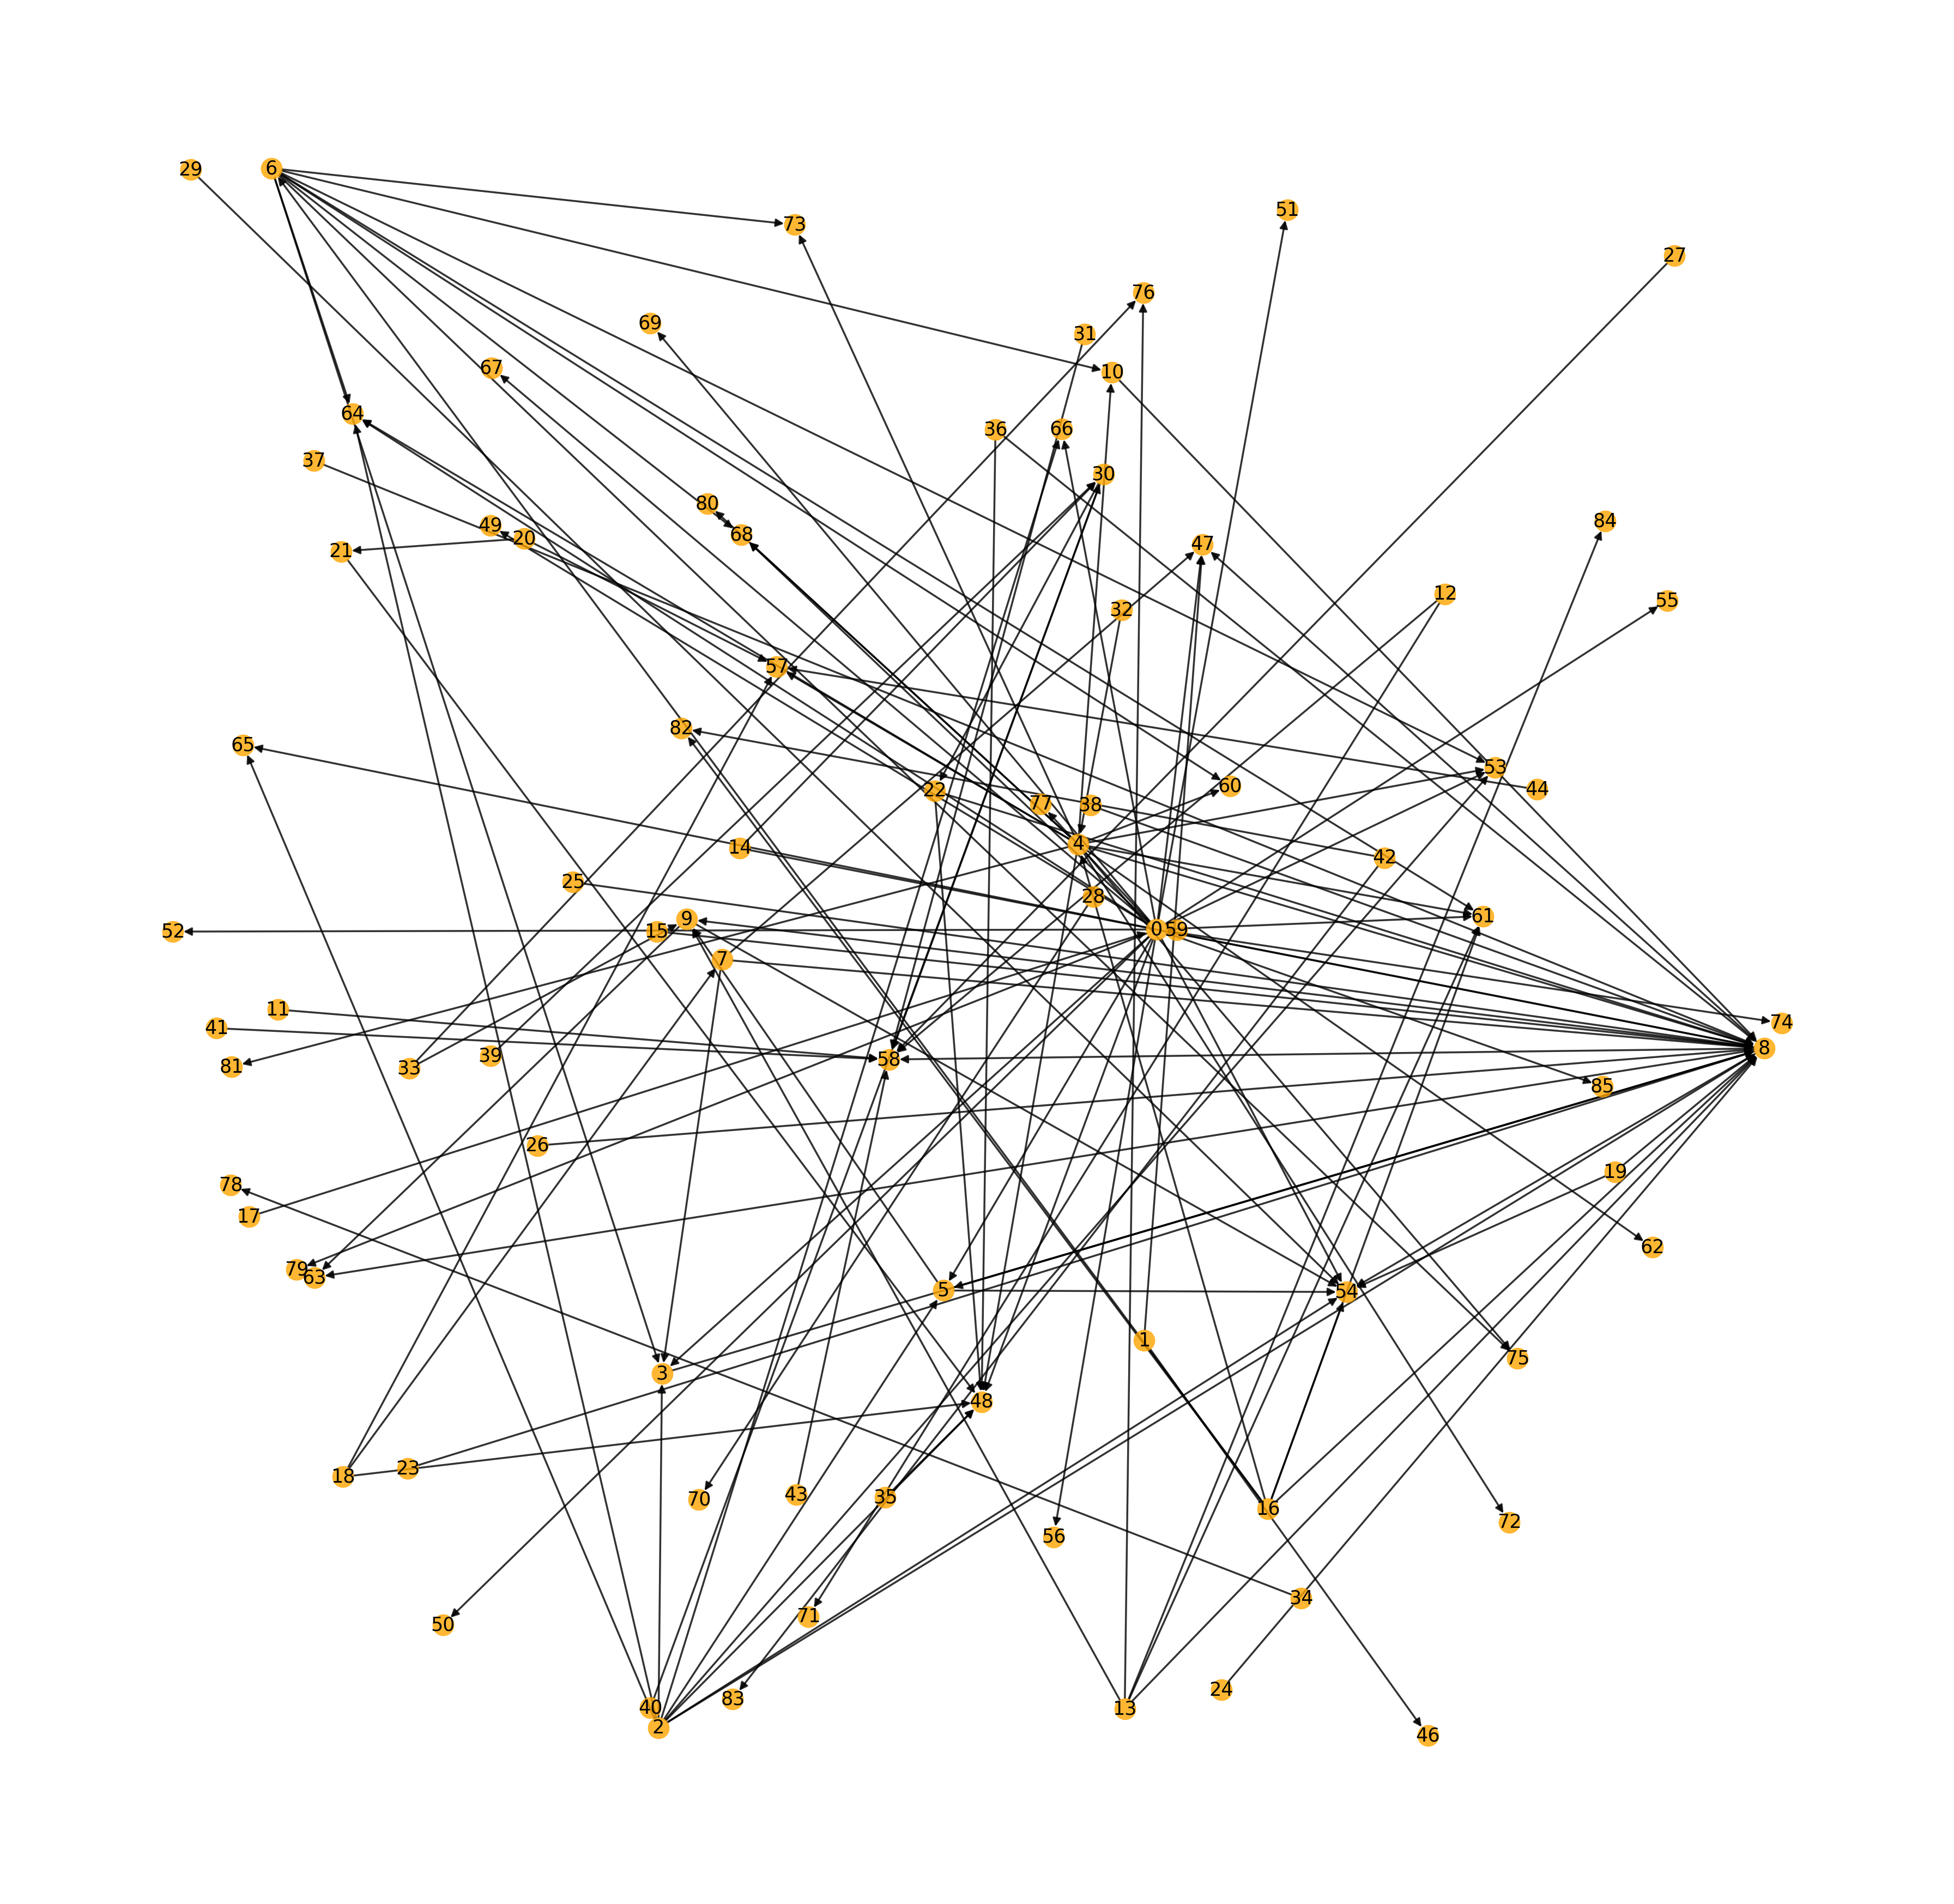

In [62]:
import matplotlib.pyplot as plt

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


pos = nx.random_layout(G,seed=10)
pos_nodes = nudge(pos, 0., 0.)                              # shift the layout

fig, ax = plt.subplots(1,1,figsize=(64,64))
nx.draw(G, pos=pos, with_labels=False,style="solid",arrowsize=30,node_color='orange',alpha=0.8, font_color="green",width=3.5,node_size=1500)   # default nodes and edges
nx.draw_networkx_labels(G, pos=pos_nodes,font_size=35)         # nudged labels
#ax.set_ylim(tuple(i*1.1 for i in ax.get_ylim()))      # expand plot to fit labels
#plt.show()
#plt.savefig('test.jpg')

In [63]:
from collections import defaultdict

data = []
for k in dict(G.in_degree()).keys():
    data.append((layer2_nodes2name[k],k,G.in_degree()[k],G.out_degree()[k],nx.in_degree_centrality(G)[k],nx.out_degree_centrality(G)[k],nx.betweenness_centrality(G)[k]))

In [64]:
df = pd.DataFrame(data, columns =['Node name','Node id', 'In degree', 'Out degree','In degree centrality','Out degree centrality','Betweeness centrality'])

In [65]:
df

,Node name,Node id,In degree,Out degree,In degree centrality,Out degree centrality,Betweeness centrality
0,white blood cell counts,46,1,0,0.011905,0.000000,0.0
1,blood pressure,47,4,0,0.047619,0.000000,0.0
2,cognitive function,48,8,0,0.095238,0.000000,0.0
3,serum uric acid,49,1,0,0.011905,0.000000,0.0
4,incident chronic kidney disease,50,1,0,0.011905,0.000000,0.0
...,...,...,...,...,...,...,...
80,BMI,40,0,1,0.000000,0.011905,0.0
81,openness to experiences,41,0,1,0.000000,0.011905,0.0
82,metabolic syndrome component,42,0,2,0.000000,0.023810,0.0
83,stressful life events,43,0,1,0.000000,0.011905,0.0


In [66]:
df.sort_values(by=['In degree'],ascending=False)

,Node name,Node id,In degree,Out degree,In degree centrality,Out degree centrality,Betweeness centrality
48,DNAmethylation,8,20,6,0.238095,0.071429,0.020009
12,mortality,58,8,0,0.095238,0.000000,0.000000
2,cognitive function,48,8,0,0.095238,0.000000,0.000000
8,lung function,54,8,0,0.095238,0.000000,0.000000
15,inflammation biomarkers,61,5,0,0.059524,0.000000,0.000000
...,...,...,...,...,...,...,...
60,hormone,20,0,2,0.000000,0.023810,0.000000
63,anxiety,23,0,1,0.000000,0.011905,0.000000
64,hostility,24,0,1,0.000000,0.011905,0.000000
65,happiness,25,0,1,0.000000,0.011905,0.000000


In [67]:
df.sort_values(by=['Out degree'],ascending=False)

,Node name,Node id,In degree,Out degree,In degree centrality,Out degree centrality,Betweeness centrality
40,air pollution,0,1,25,0.011905,0.297619,0.004016
44,bone lead,4,2,15,0.023810,0.178571,0.004375
42,temperature,2,0,9,0.000000,0.107143,0.000000
46,blood lead,6,1,9,0.011905,0.107143,0.000645
48,DNAmethylation,8,20,6,0.238095,0.071429,0.020009
...,...,...,...,...,...,...,...
26,olfactory recognition,72,1,0,0.011905,0.000000,0.000000
25,psychological well-being,71,1,0,0.011905,0.000000,0.000000
24,reactivity to health stressors,70,1,0,0.011905,0.000000,0.000000
23,microRNA,69,1,0,0.011905,0.000000,0.000000


In [68]:
from networkx.algorithms import community

In [69]:
c = community.greedy_modularity_communities(G)

In [70]:
c

[frozenset({0,
            2,
            3,
            17,
            49,
            50,
            51,
            52,
            55,
            56,
            59,
            65,
            66,
            67,
            69,
            74,
            77,
            79,
            85}),
 frozenset({5,
            8,
            9,
            13,
            15,
            19,
            23,
            24,
            25,
            26,
            29,
            33,
            37,
            38,
            54,
            63,
            76,
            84}),
 frozenset({4, 6, 10, 16, 32, 53, 60, 61, 62, 64, 68, 72, 73, 75, 80, 81}),
 frozenset({11, 12, 14, 22, 27, 30, 31, 39, 40, 41, 43, 58, 71}),
 frozenset({1, 7, 18, 20, 21, 35, 36, 44, 46, 47, 48, 57}),
 frozenset({42, 82, 83}),
 frozenset({28, 70}),
 frozenset({34, 78})]

In [71]:
for v in c[0]:
    print(layer2_nodes2name[v])

air pollution
incident metabolic syndrome
temperature
metabolites
metabolic syndrome components
fasting blood glucose
microRNA
perceived stress
arterial stiffness
intima-media thickness of the common carotid artery
road proximity
oxidative DNA damage
serum uric acid
incident chronic kidney disease
blood urea nitrogen
glomerular filtration rate
hemoglobin concentration
intraocular pressure
leukocyte distribution


In [72]:
for v in c[1]:
    print(layer2_nodes2name[v])

pessimism
asthma
allergic phenotypes
mitochondrial DNA
DNAmethylation
leukocyte telomere length
leukocyte telomere length change rate
optimism
drug use
relative humidity
endothelial dysfunction markers
lung function
anxiety
hostility
happiness
life satisfaction
tocopherol levels
incident cancer


In [73]:
for v in c[-1]:
    print(layer2_nodes2name[v])

sleep
alzheimer disease biomarkers
